In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('../dataset/tips.csv')
df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


(array([41., 79., 66., 27., 19.,  5.,  4.,  1.,  1.,  1.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

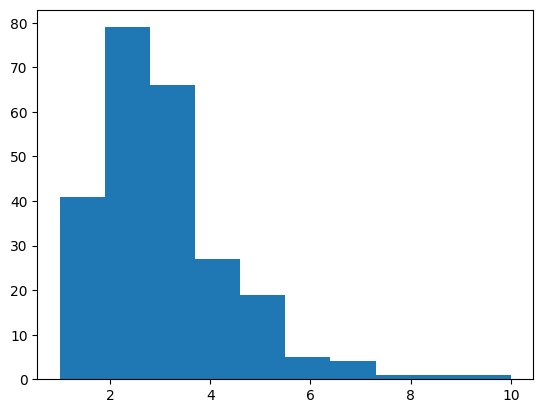

In [6]:
plt.hist(df['tip']) # serie pandas
# plt.plot(df['tip'].values) # array numpy
# type(df['tip'].values)

In [7]:
df_tip_by_time = pd.DataFrame(df.groupby('time')['tip'].sum()).reset_index()
df_tip_by_time

,time,tip
0,Dinner,546.07
1,Lunch,185.51


<BarContainer object of 2 artists>

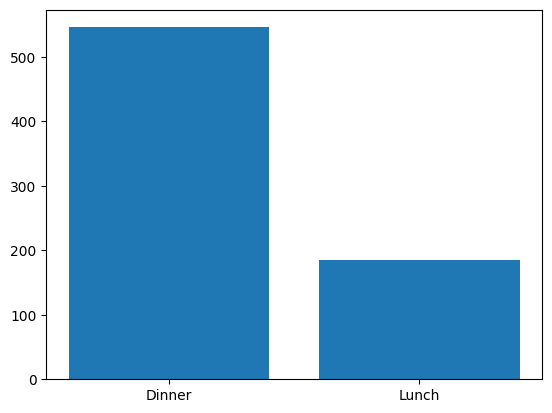

In [8]:
plt.bar(df_tip_by_time['time'], df_tip_by_time['tip'])

Text(0.5, 0, 'Dineritos')

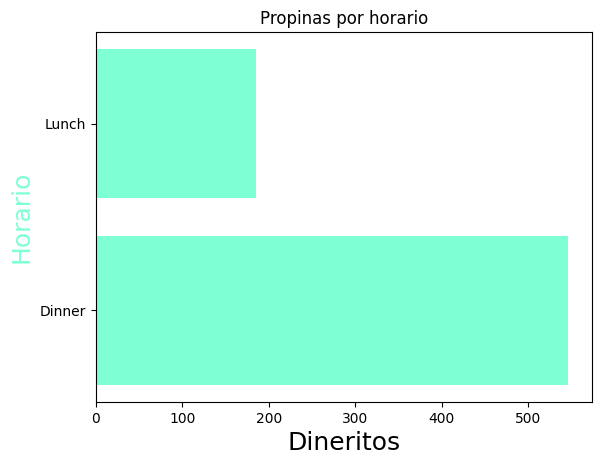

In [9]:
plt.barh(df_tip_by_time['time'], df_tip_by_time['tip'], color = "aquamarine")
# Personalizar: https://matplotlib.org/stable/gallery/color/named_colors.html
plt.title('Propinas por horario')
plt.ylabel('Horario', size=18, color='aquamarine')
plt.xlabel('Dineritos', size=18)

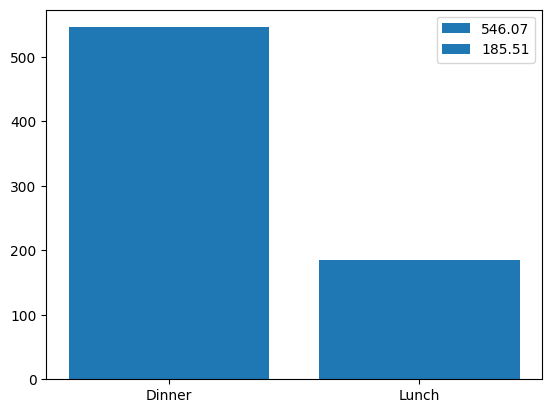

In [10]:
bars = plt.bar(df_tip_by_time['time'], df_tip_by_time['tip'])
labels = [str(bar.get_height()) for bar in bars]
plt.legend(bars, labels)

array([[<Axes: title={'center': 'survived'}>,
        <Axes: title={'center': 'pclass'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'sibsp'}>],
       [<Axes: title={'center': 'parch'}>,
        <Axes: title={'center': 'fare'}>]], dtype=object)

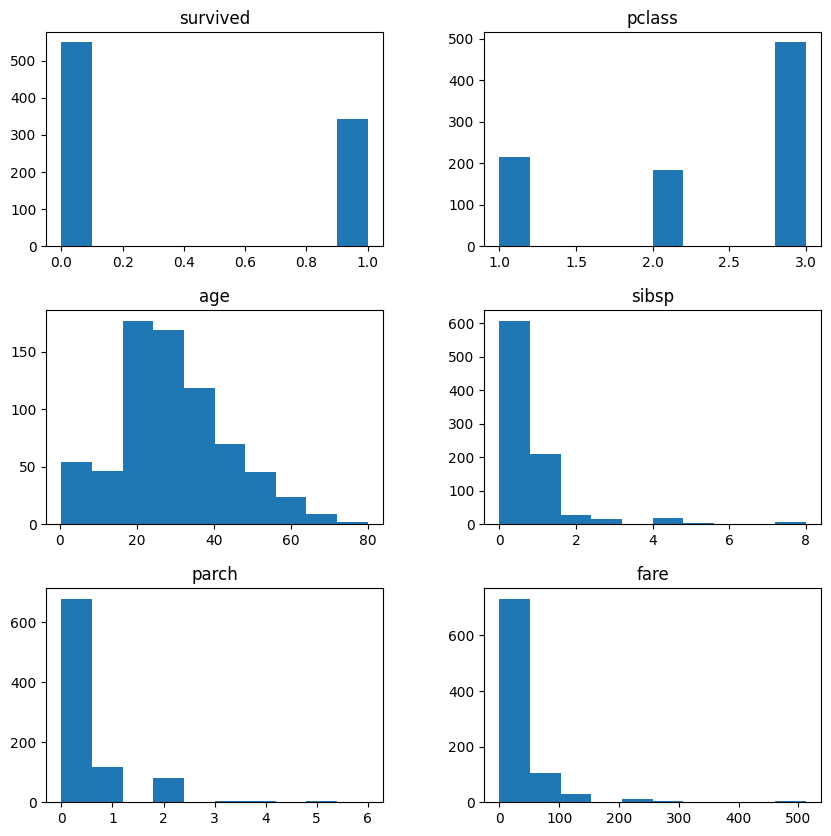

In [11]:
# histogram directamente con pandas
df = pd.read_csv('../dataset/titanic.csv')
# df.hist(figsize=(10, 10))
df.hist(figsize=(10, 10), grid=False)

(array([ 44.,  24.,  32., 104., 115., 127.,  80.,  59.,  49.,  30.,  22.,
         17.,   4.,   6.,   1.]),
 array([ 0.42      ,  5.72533333, 11.03066667, 16.336     , 21.64133333,
        26.94666667, 32.252     , 37.55733333, 42.86266667, 48.168     ,
        53.47333333, 58.77866667, 64.084     , 69.38933333, 74.69466667,
        80.        ]),
 <BarContainer object of 15 artists>)

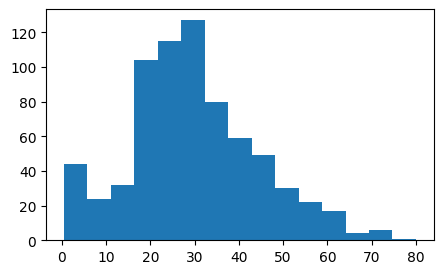

In [12]:
plt.figure(figsize=(5,3))
plt.hist(df['age'], bins=15)

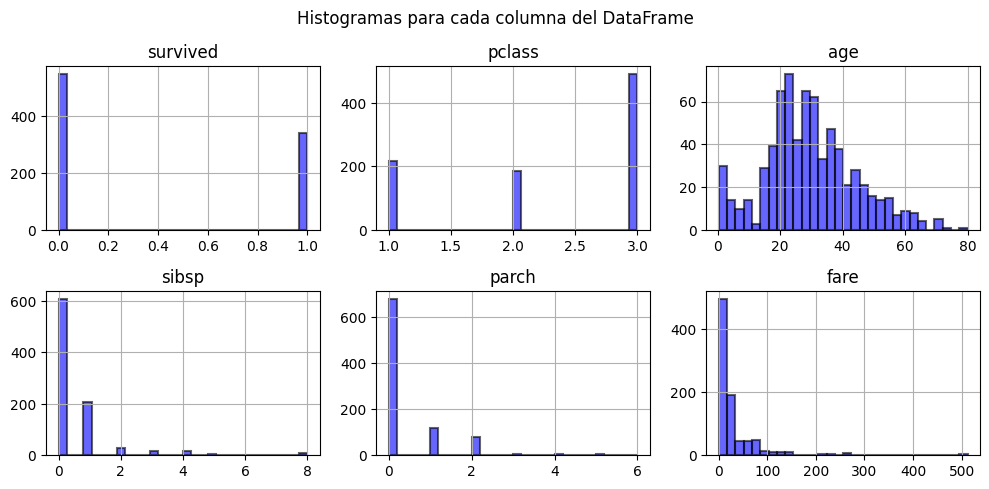

In [13]:
df.hist(bins=30, alpha=0.6, color='b', edgecolor='k', linewidth=1.5, figsize=(10,7), layout=(3,3))
plt.suptitle('Histogramas para cada columna del DataFrame')
plt.tight_layout()

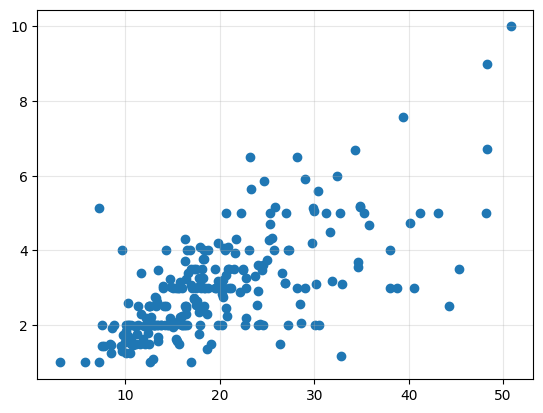

In [14]:
df = pd.read_csv('../dataset/tips.csv')
plt.scatter(df['total_bill'], df['tip'])
plt.grid(alpha=0.3)

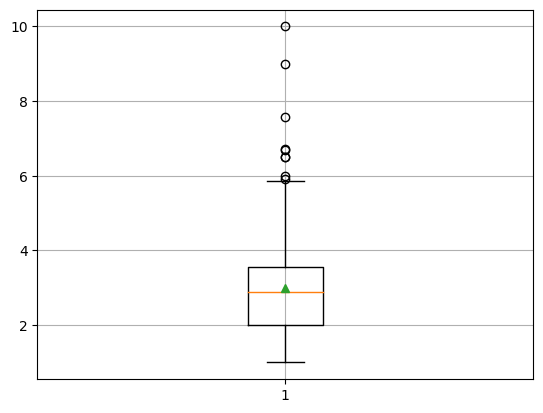

In [15]:
plt.boxplot(df['tip'], showmeans=True)
plt.grid()

## Guardar gráficos

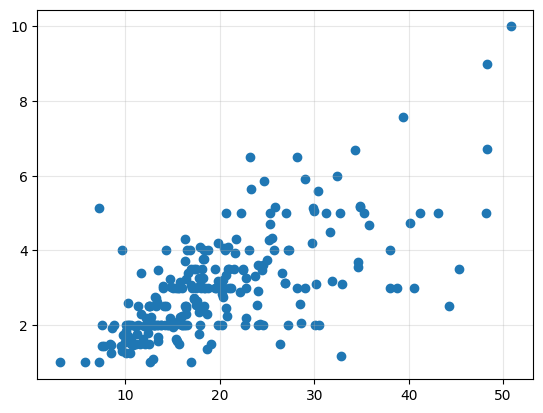

In [3]:
df = pd.read_csv('../dataset/tips.csv')
plt.scatter(df['total_bill'], df['tip'])
plt.grid(alpha=0.3)
plt.savefig('example1.pdf', dpi=50)

{'bodies': [<matplotlib.collections.PolyCollection at 0x249cfff87f0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x249cfff86d0>,
 'cmins': <matplotlib.collections.LineCollection at 0x249cfff8df0>,
 'cbars': <matplotlib.collections.LineCollection at 0x249cfff9150>}

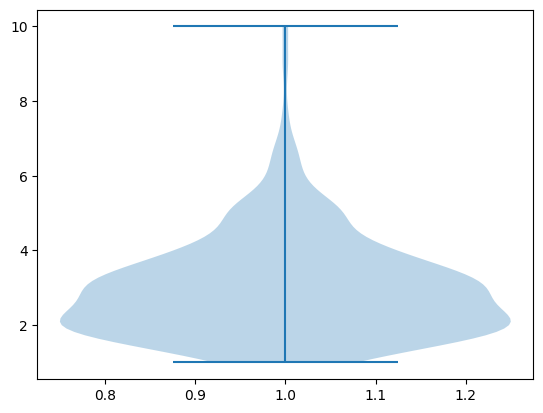

In [16]:
df = pd.read_csv('../dataset/tips.csv')
plt.violinplot(df['tip'])

#### Revisar en casa.....

In [ ]:
df = pd.read_csv('../dataset/tips.csv').dropna()
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))

ax1.violinplot(df['tip'], showmedians=True)
ax1.set_title('tip')

ax1.violinplot(df['total_bill'], showmedians=True)
ax1.set_title('total_bill')

ax1.violinplot(df['size'], showmedians=True)
ax1.set_title('size')







#### pasar de texto a numérico

['Female' 'Male']
['Dinner' 'Lunch']
['No' 'Yes']
['Sun' 'Sat' 'Thur' 'Fri']


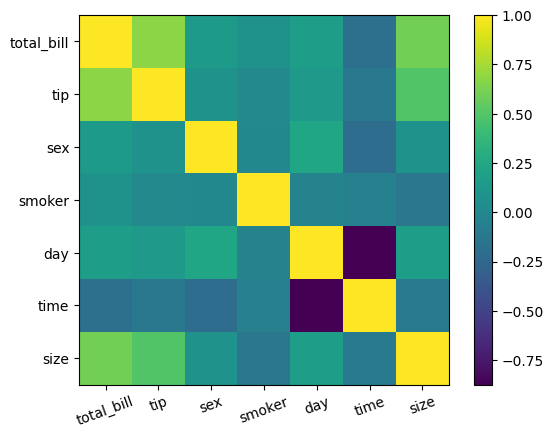

In [38]:
df = pd.read_csv('../dataset/tips.csv').dropna()

print(df['sex'].unique())
print(df['time'].unique())
print(df['smoker'].unique())
print(df['day'].unique())

df['sex'] = df['sex'].map({
    'Female': 0,
    'Male': 1
})

df['time'] = df['time'].map({
    'Dinner': 0,
    'Lunch': 1
})

df['smoker'] = df['smoker'].map({
    'No': 0,
    'Yes': 1
})

df['day'] = df['day'].map({
    'Thur': 0,
    'Fri': 1,
    'Sat': 2,
    'Sun': 3
})

#  df.head()

## calcular correlaciones df.corr()
df_corr = df.corr()

plt.imshow(df_corr, cmap='viridis')
plt.colorbar()
plt.xticks(range(len(df_corr)), df_corr.columns, rotation=20);
plt.yticks(range(len(df_corr)), df_corr.columns);


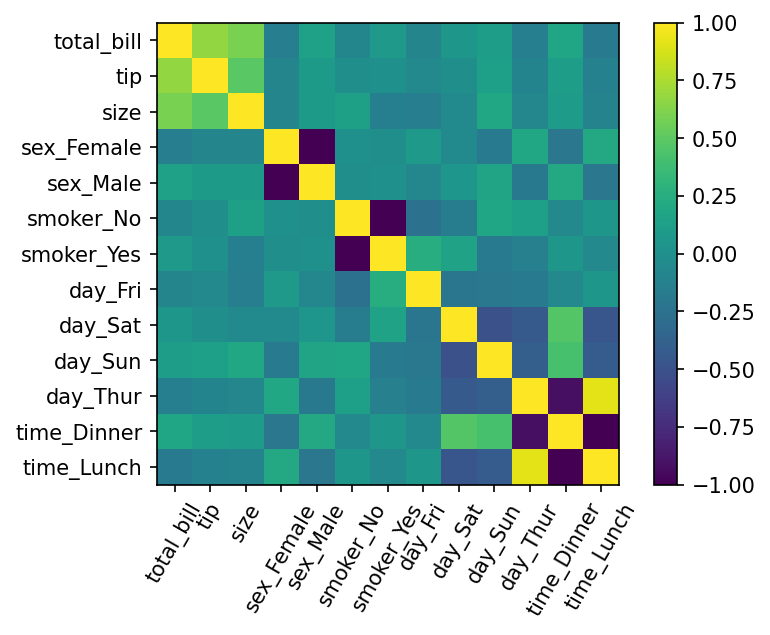

In [45]:
# crear nueva columna por cada posible valor de las columnas 
# get_dumies()
df = pd.read_csv('../dataset/tips.csv').dropna()
df = pd.get_dummies(df)
df_corr = df.corr()
plt.figure(figsize=(6,4), dpi=150)
plt.imshow(df_corr, cmap='viridis')
plt.colorbar()
plt.xticks(range(len(df_corr)), df_corr.columns, rotation=60);
plt.yticks(range(len(df_corr)), df_corr.columns);


In [47]:
df = pd.read_csv('../dataset/tips.csv').dropna()
df = pd.get_dummies(df)
df.head(2)

,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,16.99,1.01,2,1,0,1,0,0,0,1,0,1,0
1,10.34,1.66,3,0,1,1,0,0,0,1,0,1,0
